In [ ]:
  try:
    import GPy
  except ModuleNotFoundError:
    %pip install GPy
    import GPy


  try:
    import distrax
  except ModuleNotFoundError:
    %pip install distrax
    import distrax
  try:
    import jax
  except ModuleNotFoundError:
    %pip install jax 
    import jax

  import jax.numpy as jnp
  try:
    import matplotlib.pyplot as plt
  except ModuleNotFoundError:
    %pip install matplotlib 
    import matplotlib.pyplot as plt

  try:
    import tinygp
  except ModuleNotFoundError:
    %pip install tinygp
    import tinygp


  try:
    import torch
  except ModuleNotFoundError:
    %pip install torch
    import torch

  try:
    import gpytorch
  except ModuleNotFoundError:
    %pip install gpytorch
    import gpytorch

  from gpytorch.kernels import ScaleKernel, RBFKernel
  from torch.distributions import Normal, MultivariateNormal
  jax.config.update("jax_enable_x64", True)


  from tinygp import kernels, GaussianProcess
  import numpy as np
  import GPy

########### Iteration0

Name : GP regression
Objective : 1759.5946638121302
Number of Parameters : 3
Number of Optimization Parameters : 2
Updates : True
Parameters:
  GP_regression.           |  value  |  constraints  |  priors
  rbf.variance             |    5.0  |      +ve      |        
  rbf.lengthscale          |    0.5  |   +ve fixed   |        
  Gaussian_noise.variance  |    3.0  |      +ve      |        


Optimization restart 1/5, f = 1544.6701041945194
Optimization restart 2/5, f = 1544.670104193407
Optimization restart 3/5, f = 1544.6701042696113
KeyboardInterrupt caught, calling on_optimization_end() to round things up


KeyboardInterrupt: 

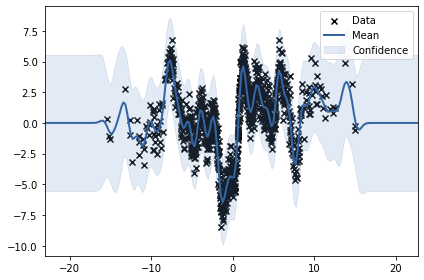

In [2]:
# seed = np.random.randint(100, size=10)
for i in range(10):

  print("########### Iteration:  "+str(i))
  # key = jax.random.PRNGKey(seed[i])
  # X_dist = distrax.Normal(jnp.array(0.0),jnp.array(5.0))
  # X = X_dist.sample(seed=key, sample_shape = (1024,)).reshape(-1,1)
  # key_ = jax.random.split(key, num=4)
  # # print(X.shape)
  # varf = 4.0
  # len_scale = 0.5
  # vary = 1.0

  # kernel = varf*kernels.ExpSquared(scale=len_scale)
  # cov = kernel(X, X) + vary * jnp.eye(len(X))
  # mean_vec = jnp.zeros(1024,)
  # Y_dist = distrax.MultivariateNormalFullCovariance(mean_vec, cov)
  # Y = Y_dist.sample(seed=key_[0]).reshape(-1,1)

  torch.manual_seed(0)
  x_dist = Normal(torch.tensor([0.0]), torch.tensor([5.0]))
  X = x_dist.sample((1024,))
  K = ScaleKernel(RBFKernel())
  K.base_kernel.lengthscale = 0.5
  K.outputscale = 3.5
  cov = K(X,X) + (1.0)*(torch.eye(len(X)))
  dist = MultivariateNormal(torch.zeros((1024)),cov.evaluate())
  torch.manual_seed(i+1)
  Y = dist.sample()

  X = np.asarray(X)
  X = jnp.array(X)

  Y = np.asarray(Y)
  Y = jnp.array(Y)


  kernel = GPy.kern.RBF(1, 5.0, 0.5)

  model = GPy.models.GPRegression(X, Y, kernel, normalizer=False) 
  model.kern.lengthscale.fix()
  model.Gaussian_noise = 3.0
  print(model)
  model.plot()
  model.optimize(messages=True)#, max_iters=1e6)
  model.optimize_restarts(num_restarts = 5, )
  print(model)
  model.plot()  

In [6]:
model.optimize(messages=True)#, max_iters=1e6)
model.optimize_restarts(num_restarts = 5)

Optimization restart 1/5, f = 1487.9773032522671
Optimization restart 2/5, f = 1487.977303264383
Optimization restart 3/5, f = 1487.9773032517535
Optimization restart 4/5, f = 1487.9773032522075
Optimization restart 5/5, f = 1487.9773032517473



Name : GP regression
Objective : 1487.9773032517473
Number of Parameters : 3
Number of Optimization Parameters : 2
Updates : True
Parameters:
  GP_regression.           |               value  |  constraints  |  priors
  rbf.variance             |  3.2694754850383774  |      +ve      |        
  rbf.lengthscale          |                 0.5  |   +ve fixed   |        
  Gaussian_noise.variance  |  0.8909614833106273  |      +ve      |        


{'dataplot': [<matplotlib.collections.PathCollection at 0x7f5e6c3fd990>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x7f5e6c3fe890>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x7f5e6c3fead0>]}

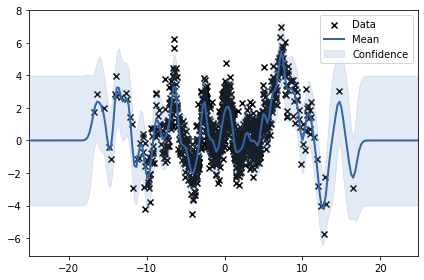

In [7]:
print(model)
model.plot()

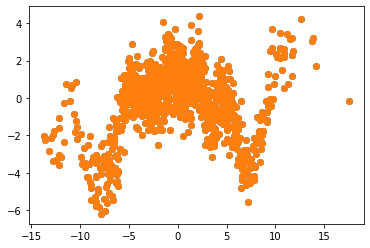

In [50]:
  # print(, key_)
key = jax.random.PRNGKey(0)
X_dist = distrax.Normal(jnp.array(0.0),jnp.array(5.0))
X = X_dist.sample(seed=key, sample_shape = (1024,)).reshape(-1,1)
key_ = jax.random.split(key, num=3)
# print(X.shape)
varf = 4.5
len_scale = 1.0
vary = 1.0

kernel = varf*kernels.ExpSquared(scale=len_scale)
cov = kernel(X, X) + vary * jnp.eye(len(X))
mean_vec = jnp.zeros(1024,)
Y_dist = distrax.MultivariateNormalFullCovariance(mean_vec, cov)
Y = Y_dist.sample(seed=key_[0]).reshape(-1,1)

X_, Y_ = jax.random.shuffle(key_[1], X), jax.random.shuffle(key_[1], Y)
plt.scatter(X,Y)
plt.scatter(X_,Y_)


Name : GP regression
Objective : 1729.9864208917108
Number of Parameters : 3
Number of Optimization Parameters : 2
Updates : True
Parameters:
  GP_regression.           |  value  |  constraints  |  priors
  rbf.variance             |    5.0  |      +ve      |        
  rbf.lengthscale          |    1.0  |   +ve fixed   |        
  Gaussian_noise.variance  |    3.0  |      +ve      |        



Name : GP regression
Objective : 1525.2282487496486
Number of Parameters : 3
Number of Optimization Parameters : 2
Updates : True
Parameters:
  GP_regression.           |               value  |  constraints  |  priors
  rbf.variance             |  3.4777542098005205  |      +ve      |        
  rbf.lengthscale          |                 1.0  |   +ve fixed   |        
  Gaussian_noise.variance  |  1.0336125123334414  |      +ve      |        


{'dataplot': [<matplotlib.collections.PathCollection at 0x7fd5a41a6620>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x7fd5a41e0c40>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x7fd5a41e2380>]}

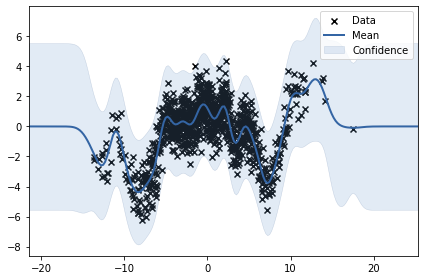

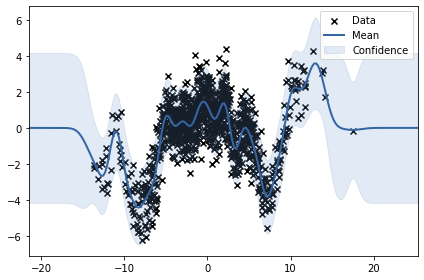

In [51]:
import GPy
kernel1 = GPy.kern.RBF(1, 5.0, 1.0)

model = GPy.models.GPRegression(X, Y, kernel1, normalizer=False) 
model.kern.lengthscale.fix()
model.Gaussian_noise = 3.0
print(model)
model.plot()
model.optimize(messages=True)#, max_iters=1e6)
# model.optimize_restarts(num_restarts = 5)
print(model)
model.plot() 